Reminders:

Since the grades are classified using numbers 1-20, we should check for inbalances (i.e. if there's only one 17)

The final report consists of a model, as well as intpreting what the accuracy could mean

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(scales)
#library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
#reading data from web
options(repr.matrix.max.rows = 10)
url<-"https://raw.githubusercontent.com/edsters78/Project_Proposal/main/student-mat.csv"
student_data<-read_csv(url)
#student_data

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



In [4]:
#tidying the data
#selecting only the variables that will be most relevant
student_data_clean <- student_data %>%
    select(sex, address, Medu, Fedu, traveltime, studytime, paid, activities, internet, famrel, Dalc, Walc, health, absences, G3) 
#student_data_clean

student_data_clean_nonly <- student_data_clean %>%
    mutate(sex = ifelse(sex == "F", 1, 0), #1 is female, 0 is male
          address = ifelse(address == "U", 1, 0), #1 is Urban, 0 is Rural
          paid = ifelse(paid == "yes", 1, 0), #1 is yes, 0 is no
          activities = ifelse(activities == "yes", 1, 0), #1 is yes, 0 is no
          internet = ifelse(internet == "yes", 1, 0)) #1 is yes, 0 is no
student_data_clean_nonly

sex,address,Medu,Fedu,traveltime,studytime,paid,activities,internet,famrel,Dalc,Walc,health,absences,G3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,4,4,2,2,0,0,0,4,1,1,3,6,6
1,1,1,1,1,2,0,0,1,5,1,1,3,4,6
1,1,1,1,1,2,1,0,1,4,2,3,3,10,10
1,1,4,2,1,3,1,1,1,3,1,1,5,2,15
1,1,3,3,1,2,1,0,0,4,1,2,5,4,10
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,1,2,2,1,2,1,0,0,5,4,5,4,11,9
0,1,3,1,2,1,0,0,1,2,3,4,2,3,16
0,0,1,1,1,1,0,0,0,5,3,3,3,3,7


In [5]:
#splitting into training and testing data
student_split <- initial_split(student_data_clean_nonly, prop = 0.75, strat = G3)
student_train <- training(student_split)
student_test <- testing(student_split)

student_train
#student_test

sex,address,Medu,Fedu,traveltime,studytime,paid,activities,internet,famrel,Dalc,Walc,health,absences,G3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,4,2,1,3,1,1,1,3,1,1,5,2,15
0,1,4,3,1,2,1,1,1,5,1,2,5,10,15
0,1,2,2,1,2,0,0,1,4,1,1,3,0,11
1,1,4,4,2,2,0,0,0,4,1,1,1,6,6
0,1,3,2,1,2,1,0,1,4,1,1,1,0,19
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,0,4,4,3,1,1,1,1,4,2,2,5,7,6
1,0,2,3,1,3,0,1,1,5,1,2,5,0,0
0,1,2,2,1,2,1,0,0,5,4,5,4,11,9


`summarise()` ungrouping output (override with `.groups` argument)



G3,n
<dbl>,<int>
0,38
4,1
5,7
6,15
7,9
⋮,⋮
16,16
17,6
18,12


G3,n
<dbl>,<int>
4,1
20,1
19,5
17,6
5,7
⋮,⋮
8,32
15,33
0,38


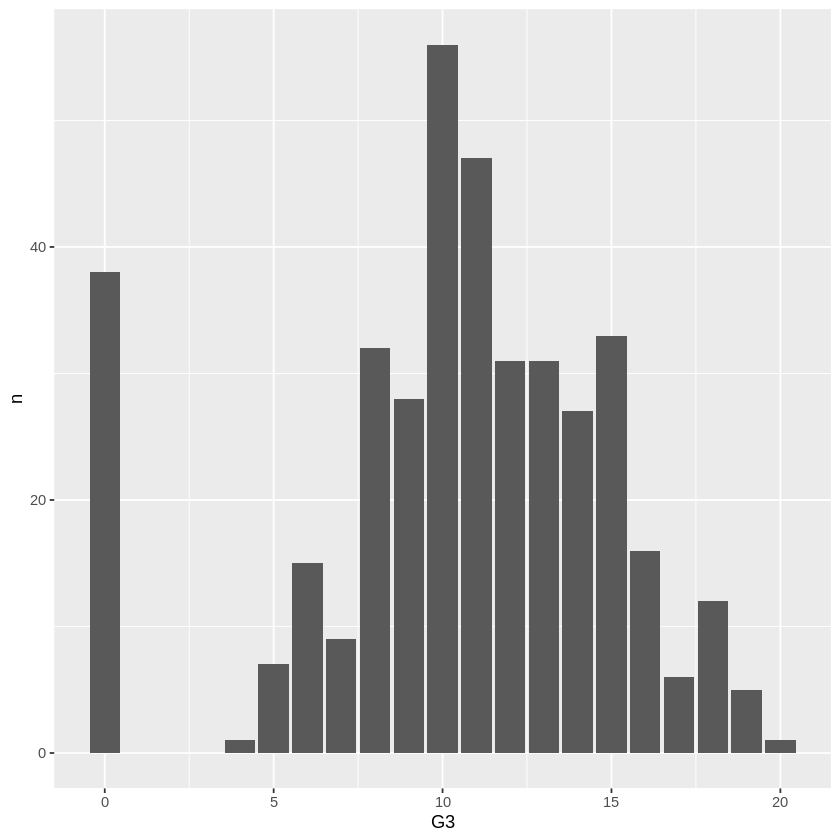

In [6]:
student_G3_count <- student_data %>%
    group_by(G3) %>%
    summarise(n = n())
student_G3_count


student_G3_count_plot <- ggplot(student_G3_count, aes(x = G3, y = n)) +
    geom_bar(stat = "identity")
student_G3_count_plot
        
student_G3_count %>% arrange(n)

In [61]:
#turning grade into a factor
# student_train_temp <- mutate(student_train, G3 = as.factor(G3)) %>%
#     select(traveltime, studytime, absences, G3)
# student_train_temp
# student_test_temp <- mutate(student_test, G3 = as.factor(G3)) %>%
#     select(traveltime, studytime, absences, G3)

student_data_clean_temp <- student_data_clean %>%
    mutate(G3 = as.factor(G3)) %>%
    select(traveltime, studytime, absences, G3)
student_data_clean_temp
student_data_clean_temp_split <- initial_split(student_data_clean_temp)
student_train_temp <- training(student_data_clean_temp_split)
student_test_temp <- testing(student_data_clean_temp_split)

student_train_temp
student_test_temp

student_recipe <- recipe(G3 ~., data = student_train_temp) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

student_vfold <- vfold_cv(student_train_temp, v = 5, strata = G3)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

k_vals <- tibble(neighbors = seq(1:50))

traveltime,studytime,absences,G3
<dbl>,<dbl>,<dbl>,<fct>
2,2,6,6
1,2,4,6
1,2,10,10
1,3,2,15
1,2,4,10
⋮,⋮,⋮,⋮
1,2,11,9
2,1,3,16
1,1,3,7


traveltime,studytime,absences,G3
<dbl>,<dbl>,<dbl>,<fct>
1,2,4,6
1,2,10,10
1,3,2,15
1,2,4,10
1,2,10,15
⋮,⋮,⋮,⋮
1,3,0,0
1,2,0,8
2,1,3,16


traveltime,studytime,absences,G3
<dbl>,<dbl>,<dbl>,<fct>
2,2,6,6
2,2,6,6
1,2,0,19
3,3,4,12
1,3,0,16
⋮,⋮,⋮,⋮
2,1,14,5
3,1,7,6
2,2,0,0


In [62]:
knn_results <- workflow() %>%
    add_recipe(student_recipe) %>%
    add_model(knn_tune) %>%
    tune_grid(resamples = student_vfold, grid = k_vals) %>%
    collect_metrics
knn_results

! Fold1: internal: No observations were detected in `truth` for level(s): '17', '...

! Fold2: internal: No observations were detected in `truth` for level(s): '4', '6...

! Fold3: internal: No observations were detected in `truth` for level(s): '4', '5...

! Fold4: internal: No observations were detected in `truth` for level(s): '4', '2...

! Fold5: internal: No observations were detected in `truth` for level(s): '4', '1...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.09453341,5,0.013046116,Model01
1,roc_auc,hand_till,0.50439890,5,0.010915411,Model01
2,accuracy,multiclass,0.10436197,5,0.015234585,Model02
2,roc_auc,hand_till,0.51589995,5,0.007995613,Model02
3,accuracy,multiclass,0.07763881,5,0.012845278,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,roc_auc,hand_till,0.52069813,5,0.01774263,Model48
49,accuracy,multiclass,0.10085525,5,0.01161028,Model49
49,roc_auc,hand_till,0.51203606,5,0.01972174,Model49


In [63]:
accuracies <- knn_results %>%
    filter(.metric == "accuracy") %>%
    arrange(desc(mean))
accuracies

k_best <- accuracies %>%
    slice(1) %>%
    pull(neighbors)
k_best

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,accuracy,multiclass,0.1177499,5,0.011757026,Model11
17,accuracy,multiclass,0.1144730,5,0.017988858,Model17
41,accuracy,multiclass,0.1109702,5,0.016984491,Model41
14,accuracy,multiclass,0.1078083,5,0.011490402,Model14
30,accuracy,multiclass,0.1077518,5,0.008508609,Model30
⋮,⋮,⋮,⋮,⋮,⋮,⋮
44,accuracy,multiclass,0.08407364,5,0.010590677,Model44
5,accuracy,multiclass,0.08080070,5,0.006217441,Model05
8,accuracy,multiclass,0.08079875,5,0.006281875,Model08


[1] 11

In [64]:
student_spec <- nearest_neighbor(weight_fun = "rectangular", neighbors = k_best) %>%
    set_engine("kknn") %>%
    set_mode("classification")

student_model <- workflow() %>%
    add_recipe(student_recipe) %>%
    add_model(student_spec) %>%
    fit(student_train_temp)
# student_model

student_predictions <- predict(student_model, student_test_temp)
student_predictions

test <- student_predictions %>%
    group_by(.pred_class) %>%
    summarise(n = n())
test

bind_cols(student_predictions, student_test_temp)

results <- student_predictions %>%
    bind_cols(student_test_temp) %>%
    metrics(truth = G3, estimate = .pred_class)
results

.pred_class
<fct>
11
11
15
10
0
⋮
9
10
0


`summarise()` ungrouping output (override with `.groups` argument)



.pred_class,n
<fct>,<int>
0,21
5,2
6,4
8,12
9,2
⋮,⋮
11,18
13,3
14,7


.pred_class,traveltime,studytime,absences,G3
<fct>,<dbl>,<dbl>,<dbl>,<fct>
11,2,2,6,6
11,2,2,6,6
15,1,2,0,19
10,3,3,4,12
0,1,3,0,16
⋮,⋮,⋮,⋮,⋮
9,2,1,14,5
10,3,1,7,6
0,2,2,0,0


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.2346939
kap,multiclass,0.1542975
